In [1]:
import os
from glob import glob

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

In [35]:
hdf_path = glob("d:/data/seaice_example/AMSR_U2_L3_SeaIce25km_R04_*.he5")
hdf_path.sort()
for idx, f in enumerate(hdf_path):
    tif = f.replace('.he5','.tif')
    print(f"gdal_translate.exe -of Gtiff  -a_srs \"+proj=stere +lat_0=-90 +lat_ts=-70 +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs\" -a_ullr -3950000 4350000 3950000 -3950000 HDF5:\"{f}\"://HDFEOS/GRIDS/SpPolarGrid25km/Data_Fields/SI_25km_SH_ICECON_DAY {tif}")

gdal_translate.exe -of Gtiff  -a_srs "+proj=stere +lat_0=-90 +lat_ts=-70 +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs" -a_ullr -3950000 4350000 3950000 -3950000 HDF5:"d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201112.he5"://HDFEOS/GRIDS/SpPolarGrid25km/Data_Fields/SI_25km_SH_ICECON_DAY d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201112.tif
gdal_translate.exe -of Gtiff  -a_srs "+proj=stere +lat_0=-90 +lat_ts=-70 +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs" -a_ullr -3950000 4350000 3950000 -3950000 HDF5:"d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201113.he5"://HDFEOS/GRIDS/SpPolarGrid25km/Data_Fields/SI_25km_SH_ICECON_DAY d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201113.tif
gdal_translate.exe -of Gtiff  -a_srs "+proj=stere +lat_0=-90 +lat_ts=-70 +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs" -a_ullr -3950000 4350000 3950000 -3950000 HDF5:"d:/data/seaice_example\AMSR_U2_L3_SeaI

In [36]:
seaice_path = glob("d:/data/seaice_example/AMSR_U2_L3_SeaIce25km_R04_*.tif")

In [37]:
seaice_path

['d:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201112.tif',
 'd:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201113.tif',
 'd:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201114.tif',
 'd:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201115.tif',
 'd:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201116.tif',
 'd:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201117.tif',
 'd:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201118.tif',
 'd:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201119.tif',
 'd:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201120.tif',
 'd:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201121.tif',
 'd:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201122.tif',
 'd:/data/seaice_example\\AMSR_U2_L3_SeaIce25km_R04_20201123.tif']

In [38]:
seaice_path.sort()

for idx, f in enumerate(seaice_path):
    print(f"{idx}: {f}")

0: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201112.tif
1: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201113.tif
2: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201114.tif
3: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201115.tif
4: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201116.tif
5: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201117.tif
6: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201118.tif
7: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201119.tif
8: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201120.tif
9: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201121.tif
10: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201122.tif
11: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201123.tif


In [49]:
for idx, f in enumerate(seaice_path):
    try:
        dset = rio.open(f)
        print(f"{idx}: {f}")
        print(dset.profile)
        band1 = dset.read(1)
        print(band1.shape)
        dset.close()
    except:
        pass

0: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201112.tif
{'driver': 'GTiff', 'dtype': 'int32', 'nodata': None, 'width': 316, 'height': 332, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unknown",GEOGCS["unknown",DATUM["unknown",SPHEROID["unknown",6378273,298.279411123064]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",-70],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",NORTH],AXIS["Northing",NORTH]]'), 'transform': Affine(25000.0, 0.0, -3950000.0,
       0.0, -25000.0, 4350000.0), 'tiled': False, 'interleave': 'band'}
(332, 316)
1: d:/data/seaice_example\AMSR_U2_L3_SeaIce25km_R04_20201113.tif
{'driver': 'GTiff', 'dtype': 'int32', 'nodata': None, 'width': 316, 'height': 332, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unknown",GEOGCS["unknown",DATUM["unknown",SPHEROID["unknown",6378273,298.279411123064]],PRIMEM["G

In [39]:
arr_st_l8, meta_l8 = es.stack(seaice_path, nodata=110)

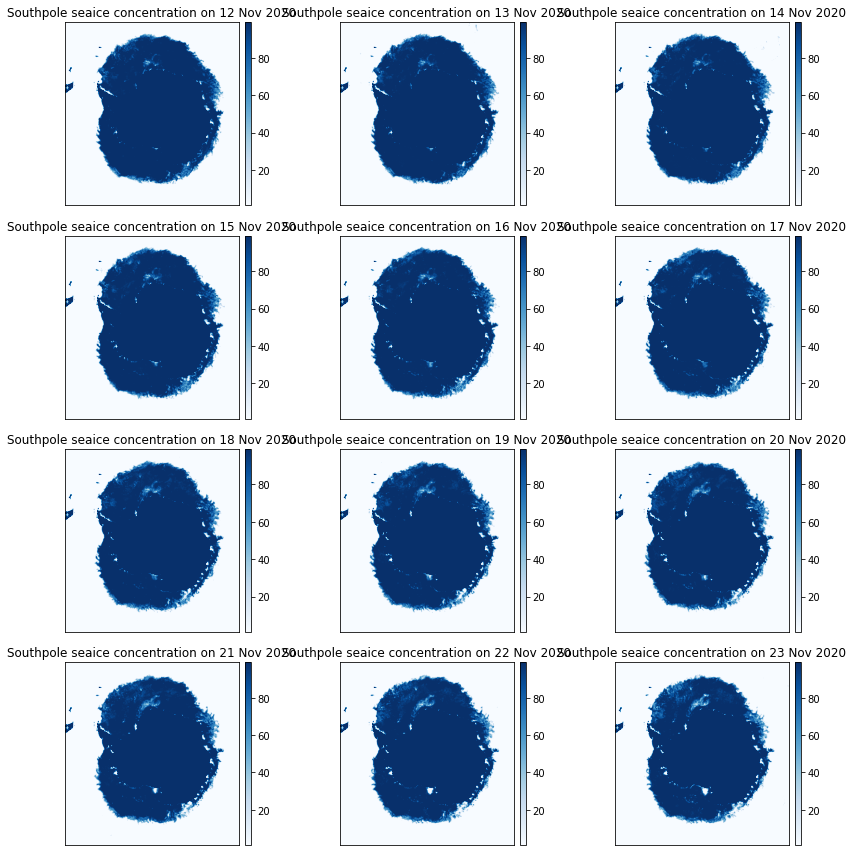

array([[<AxesSubplot:title={'center':'Southpole seaice concentration on 12 Nov 2020'}>,
        <AxesSubplot:title={'center':'Southpole seaice concentration on 13 Nov 2020'}>,
        <AxesSubplot:title={'center':'Southpole seaice concentration on 14 Nov 2020'}>],
       [<AxesSubplot:title={'center':'Southpole seaice concentration on 15 Nov 2020'}>,
        <AxesSubplot:title={'center':'Southpole seaice concentration on 16 Nov 2020'}>,
        <AxesSubplot:title={'center':'Southpole seaice concentration on 17 Nov 2020'}>],
       [<AxesSubplot:title={'center':'Southpole seaice concentration on 18 Nov 2020'}>,
        <AxesSubplot:title={'center':'Southpole seaice concentration on 19 Nov 2020'}>,
        <AxesSubplot:title={'center':'Southpole seaice concentration on 20 Nov 2020'}>],
       [<AxesSubplot:title={'center':'Southpole seaice concentration on 21 Nov 2020'}>,
        <AxesSubplot:title={'center':'Southpole seaice concentration on 22 Nov 2020'}>,
        <AxesSubplot:title={'

In [40]:
titles = [f"Southpole seaice concentration on {day} Nov 2020" for day in range(12,24)]

ep.plot_bands(arr_st_l8, cmap="Blues",title=titles, vmin=1, vmax=99)

In [41]:
import geopandas as gpd


In [42]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

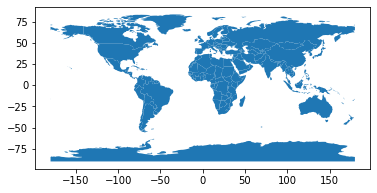

In [43]:
world.plot()

In [44]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [45]:
antarctica = world.loc[world['continent'] == 'Antarctica'].copy().reset_index()

In [46]:
antarctica_polar = antarctica.to_crs(3412)

<AxesSubplot:>

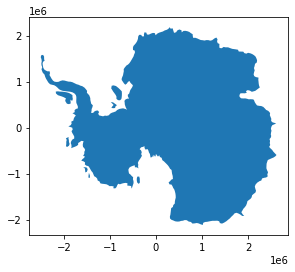

In [47]:
antarctica_polar.plot()

In [48]:
antarctica_polar.total_bounds

array([-2503931.85938088, -2116205.28434624,  2619372.61503147,
        2179770.77326112])

In [31]:
antarctica_polar.to_crs(3412).to_file("d:/data/seaice_example/antartica_3412.shp")

In [59]:
testdata = rio.open('d:/data/seaice_example/AMSR_U2_L3_SeaIce25km_R04_20201112.tif')
testdata.profile

{'driver': 'GTiff', 'dtype': 'int32', 'nodata': None, 'width': 316, 'height': 332, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unknown",GEOGCS["unknown",DATUM["unknown",SPHEROID["unknown",6378273,298.279411123064]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",-70],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",NORTH],AXIS["Northing",NORTH]]'), 'transform': Affine(25000.0, 0.0, -3950000.0,
       0.0, -25000.0, 4350000.0), 'tiled': False, 'interleave': 'band'}

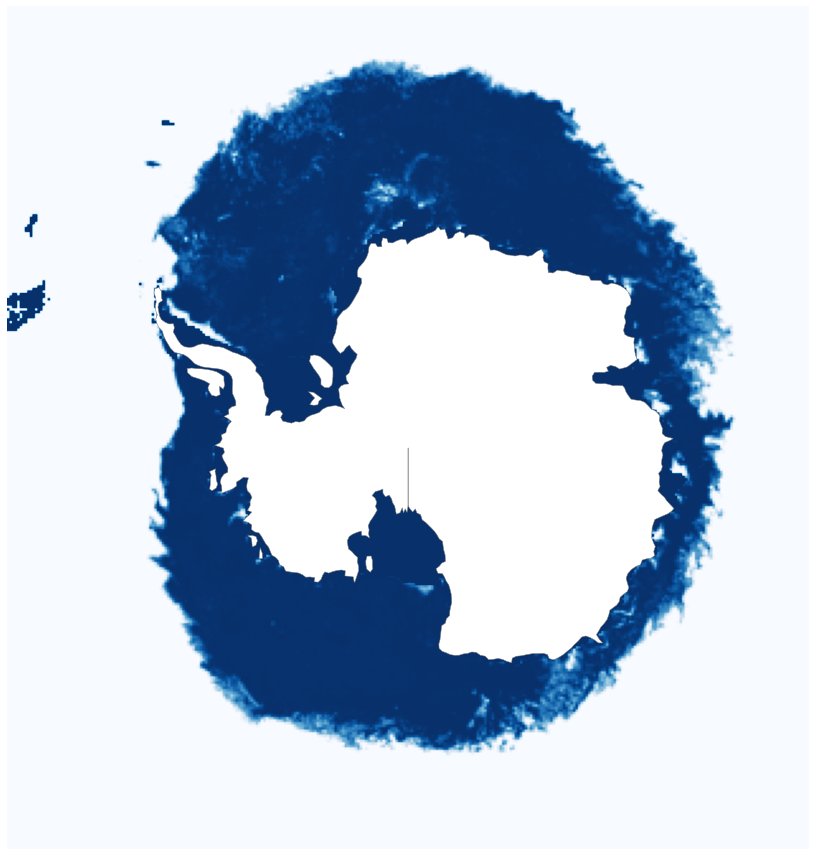

In [68]:
from rasterio.plot import show

fig, ax = plt.subplots(figsize=(14, 12))

show(testdata, ax=ax, cmap="Blues", vmin=0, vmax=100)
antarctica_polar.plot(facecolor="white", lw=0.5, edgecolor="grey",ax=ax)
plt.axis("off")
plt.savefig("antartica1.png")
plt.tight_layout()

In [52]:
print(testdata.bounds)
bounds_arr = testdata.bounds
testdata.close()

BoundingBox(left=-3950000.0, bottom=-3950000.0, right=3950000.0, top=4350000.0)


In [ ]:
extent = (bounds_arr.left  , bounds_arr.bottom,  bounds_arr.right, bounds_arr.top)

In [58]:
antarctica_polar.total_bounds

array([-2503931.85938088, -2116205.28434624,  2619372.61503147,
        2179770.77326112])

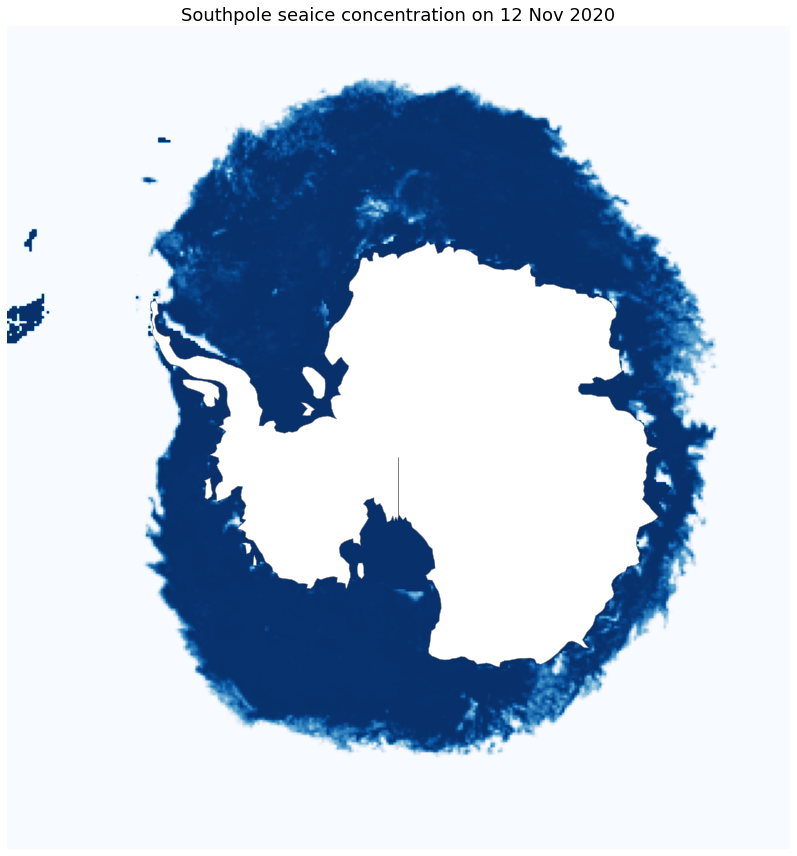

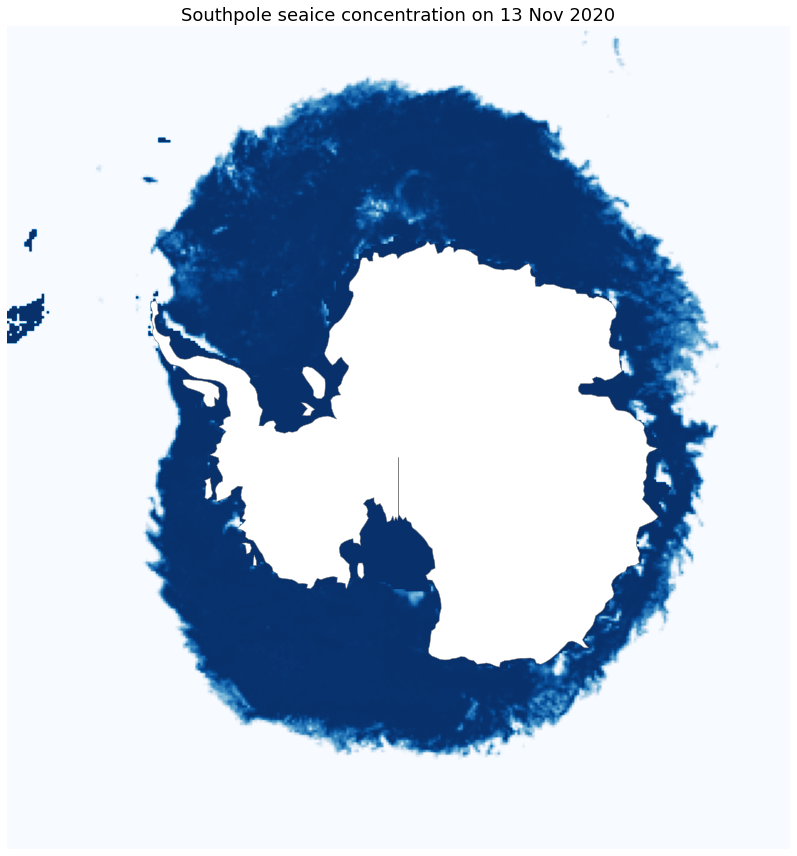

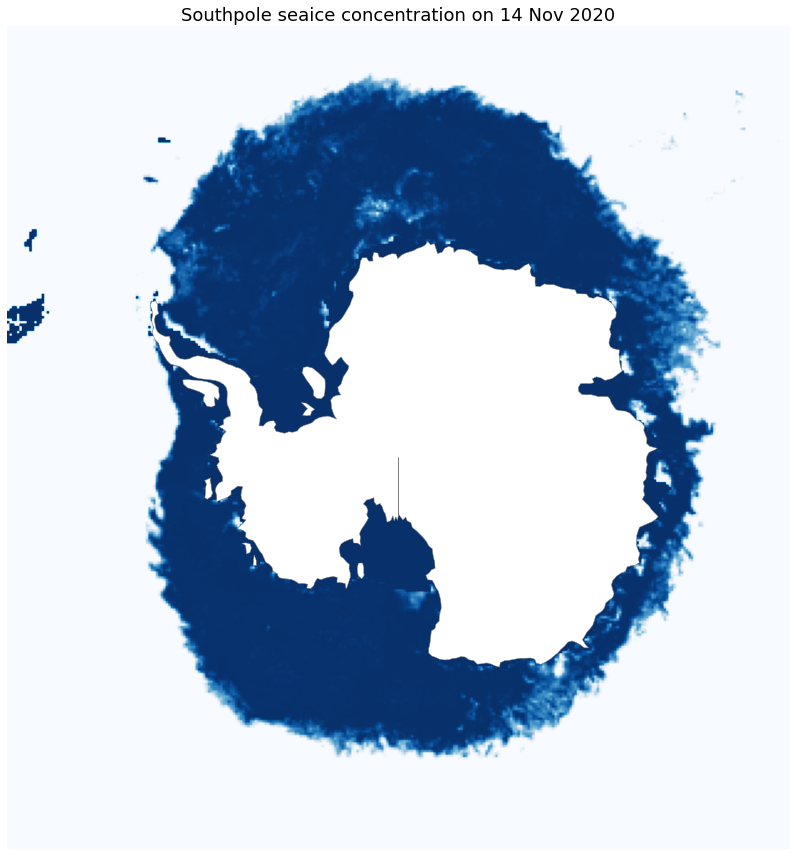

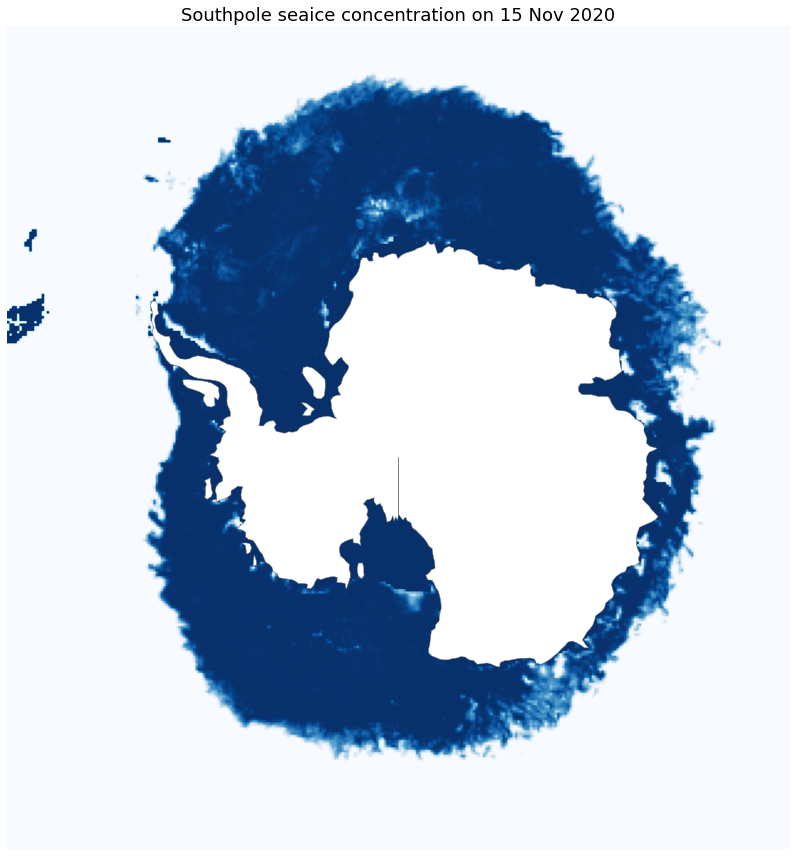

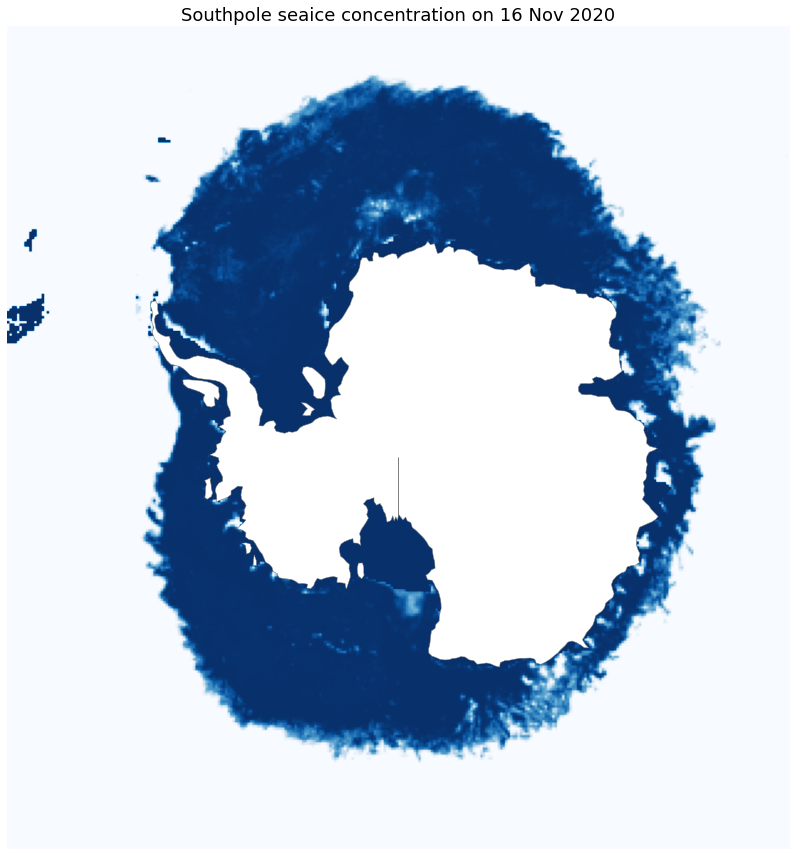

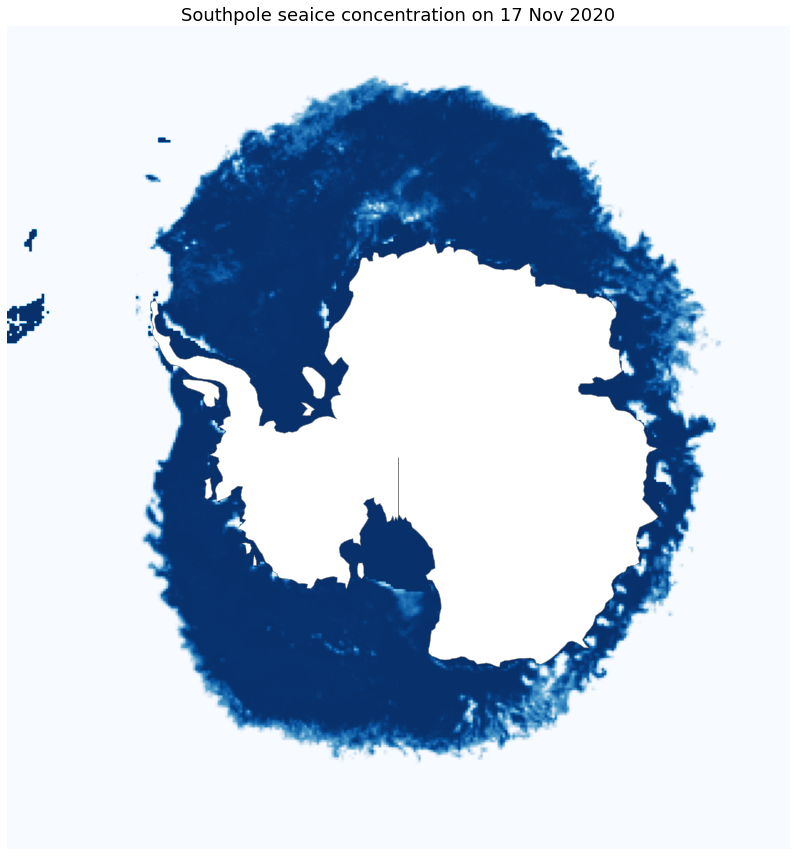

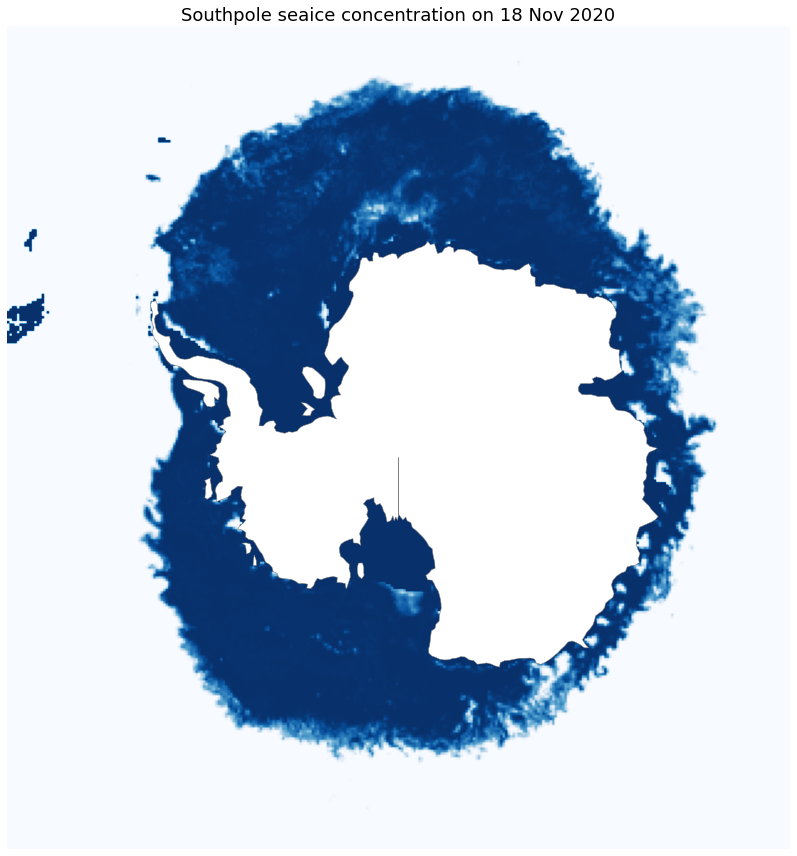

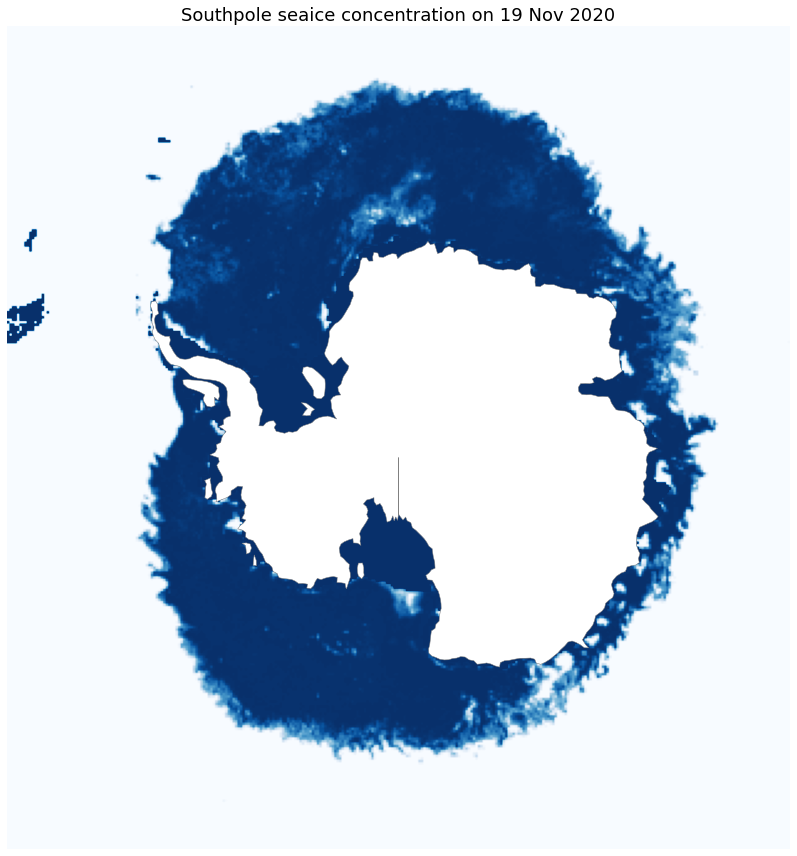

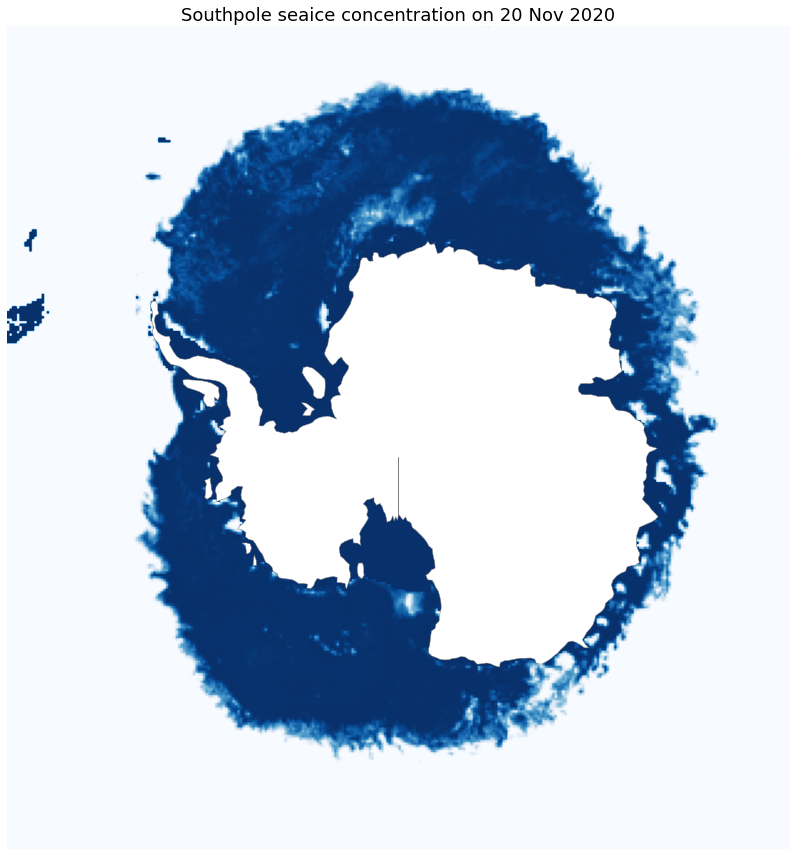

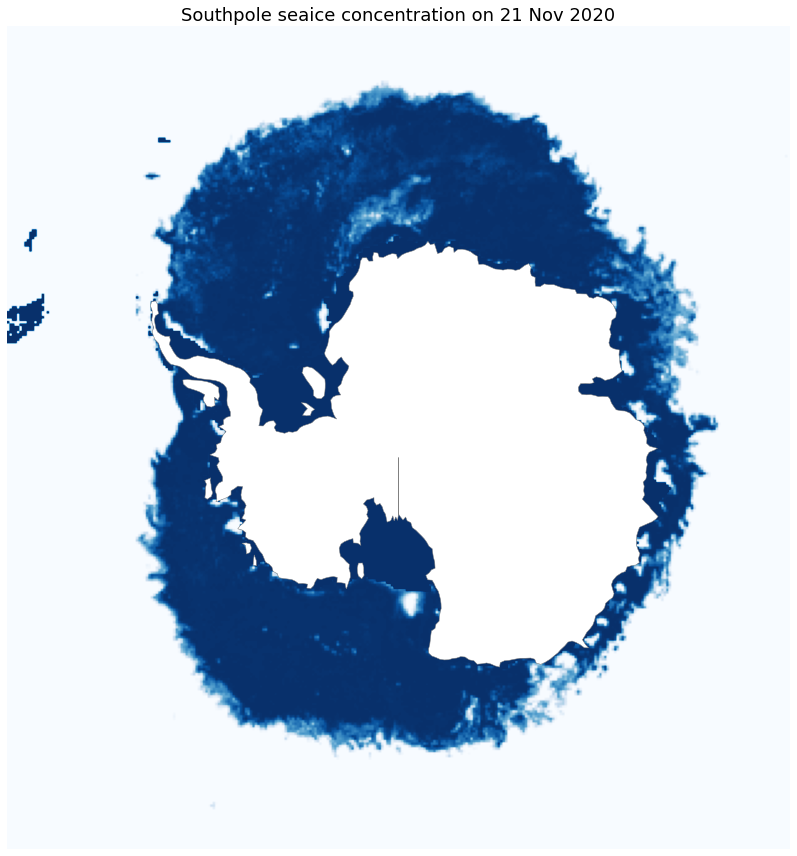

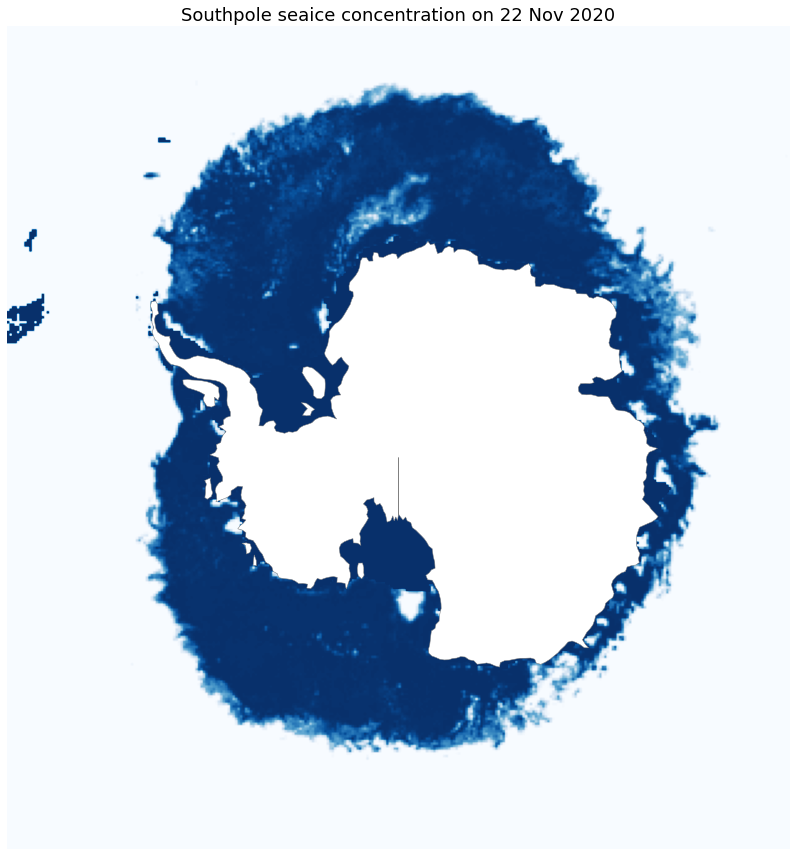

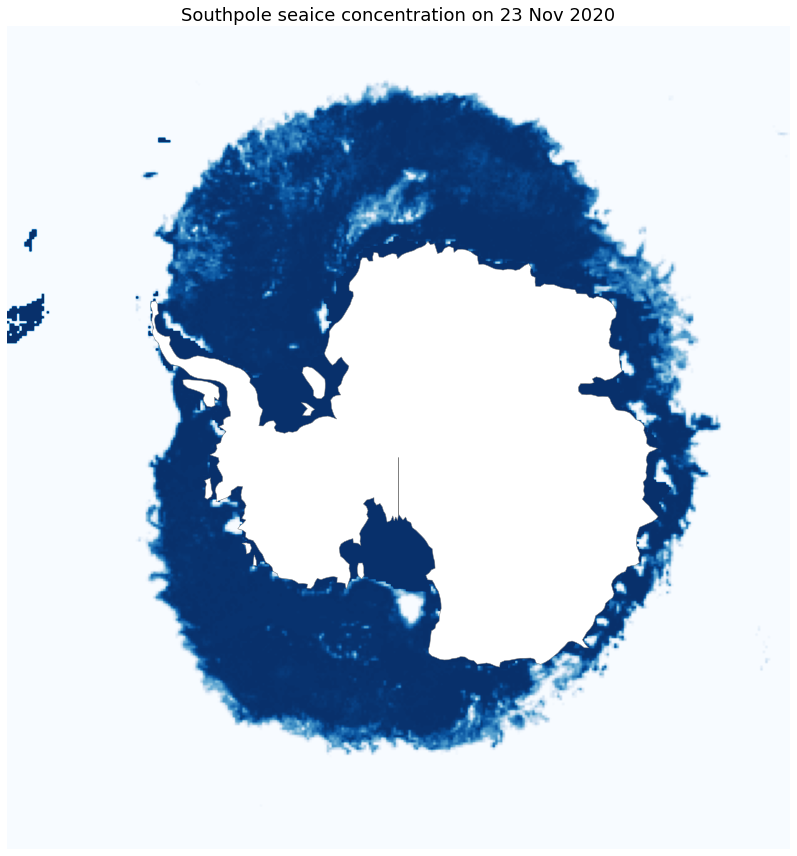

In [71]:
titles = [f"Southpole seaice concentration on {day} Nov 2020" for day in range(12,24)]


for idx, layer in enumerate(titles, start=12):
    testdata = rio.open(f'd:/data/seaice_example/AMSR_U2_L3_SeaIce25km_R04_202011{idx}.tif')
    
    fig, ax = plt.subplots(figsize=(14, 12))

    show(testdata, ax=ax, cmap="Blues", vmin=0, vmax=100)
    antarctica_polar.plot(facecolor="white", lw=0.5, edgecolor="grey",ax=ax)
    
    plt.title(layer, fontsize=18)
    plt.axis("off")
    plt.savefig(f"antartica_SeaIce25km_202011{idx}.png")
    plt.tight_layout()
    testdata.close()

In [72]:
import imageio

filenames = []
    
for idx, layer in enumerate(titles, start=12):
    fn_name = f"antartica_SeaIce25km_202011{idx}.png"
    filenames.append(fn_name)

In [73]:


images = []

for filename in filenames:
    images.append(imageio.imread(filename))
    
imageio.mimsave('antartica-10-days.gif', images, duration=0.5)

